In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [56]:
from lv.dnn.dnn_ALL import DNN_ALL

In [134]:
d = DNN_ALL(arms=["RML"],grid=0, top=60, pdx=[0,1,2], N_test=1000, pc_name="_100k")

In [135]:
d.prepare(N_train=100000, isNoisy=1)

In [136]:
d.run(lr=0.01, dp=0.01, ep=2000)

Layers: [60, 64, 32, 16, 3]
| EP 2000 |loss: 0.0163 | mean_: 0.0163 | val_l: 0.0136 | val_m: 0.0136 | lr: 0.0001 | 
Layers: [60, 64, 32, 16, 3]
| EP 2000 |loss: 0.0171 | mean_: 0.0171 | val_l: 0.0139 | val_m: 0.0139 | lr: 0.0100 | 
Layers: [60, 64, 32, 16, 3]
| EP 2000 |loss: 0.0217 | mean_: 0.0217 | val_l: 0.0193 | val_m: 0.0193 | lr: 0.0000 | 
Layers: [60, 64, 32, 16, 3]
| EP 2000 |loss: 0.0313 | mean_: 0.0313 | val_l: 0.0291 | val_m: 0.0291 | lr: 0.0010 | 
Layers: [60, 64, 32, 16, 3]
| EP 2000 |loss: 0.0156 | mean_: 0.0156 | val_l: 0.0118 | val_m: 0.0118 | lr: 0.0100 | 
Layers: [60, 64, 32, 16, 3]
| EP 2000 |loss: 0.0291 | mean_: 0.0291 | val_l: 0.0273 | val_m: 0.0273 | lr: 0.0010 | 


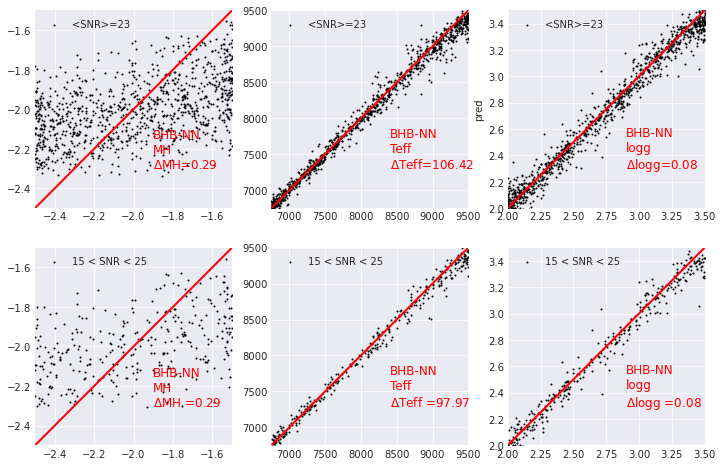

In [154]:
d.plot_pred("B", snrList=[20])

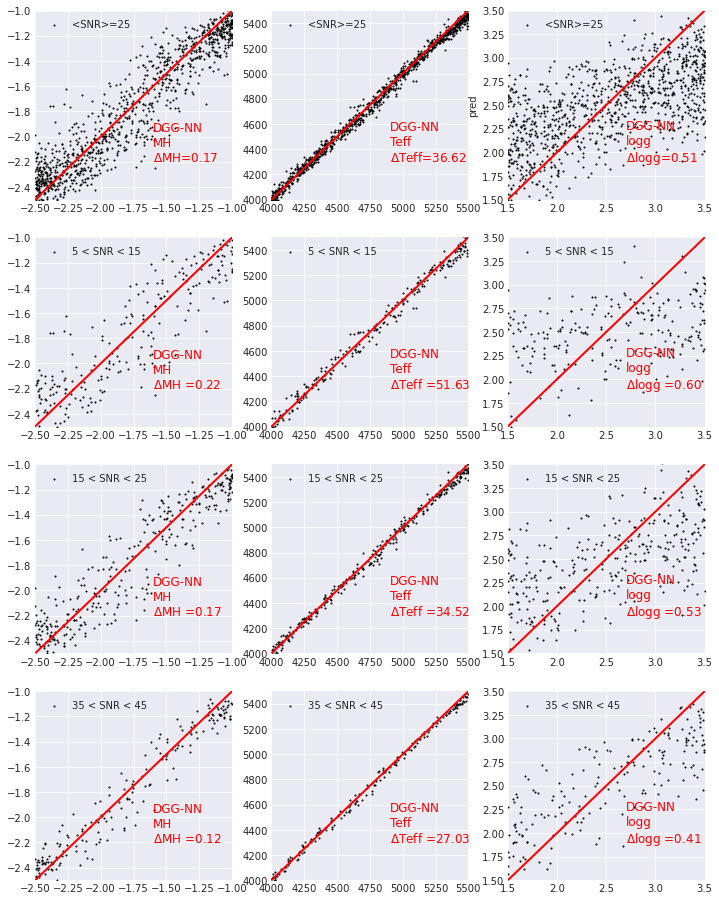

In [179]:
d.plot_pred("G", snrList=[10,20,40])

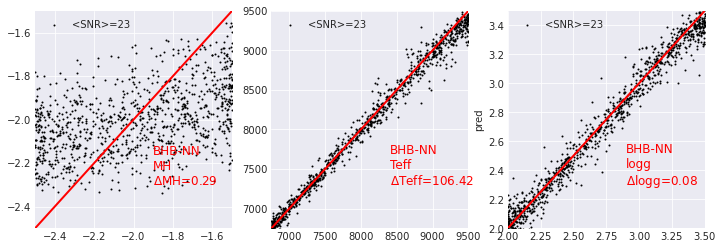

In [139]:
d.plot_pred("B")

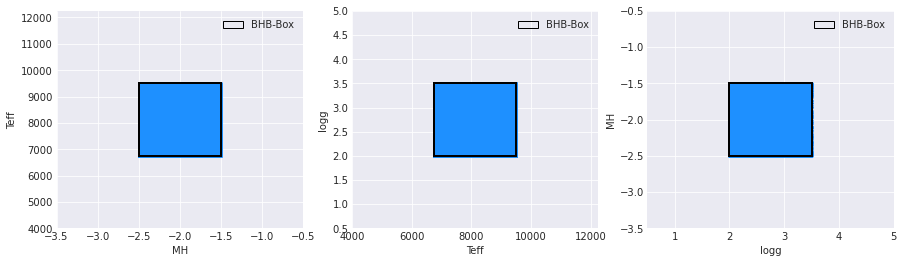

In [100]:
R0="B"
d.plot_box_R0_R1(R0,R0, data=d.p_trains[R0], n_box=1)

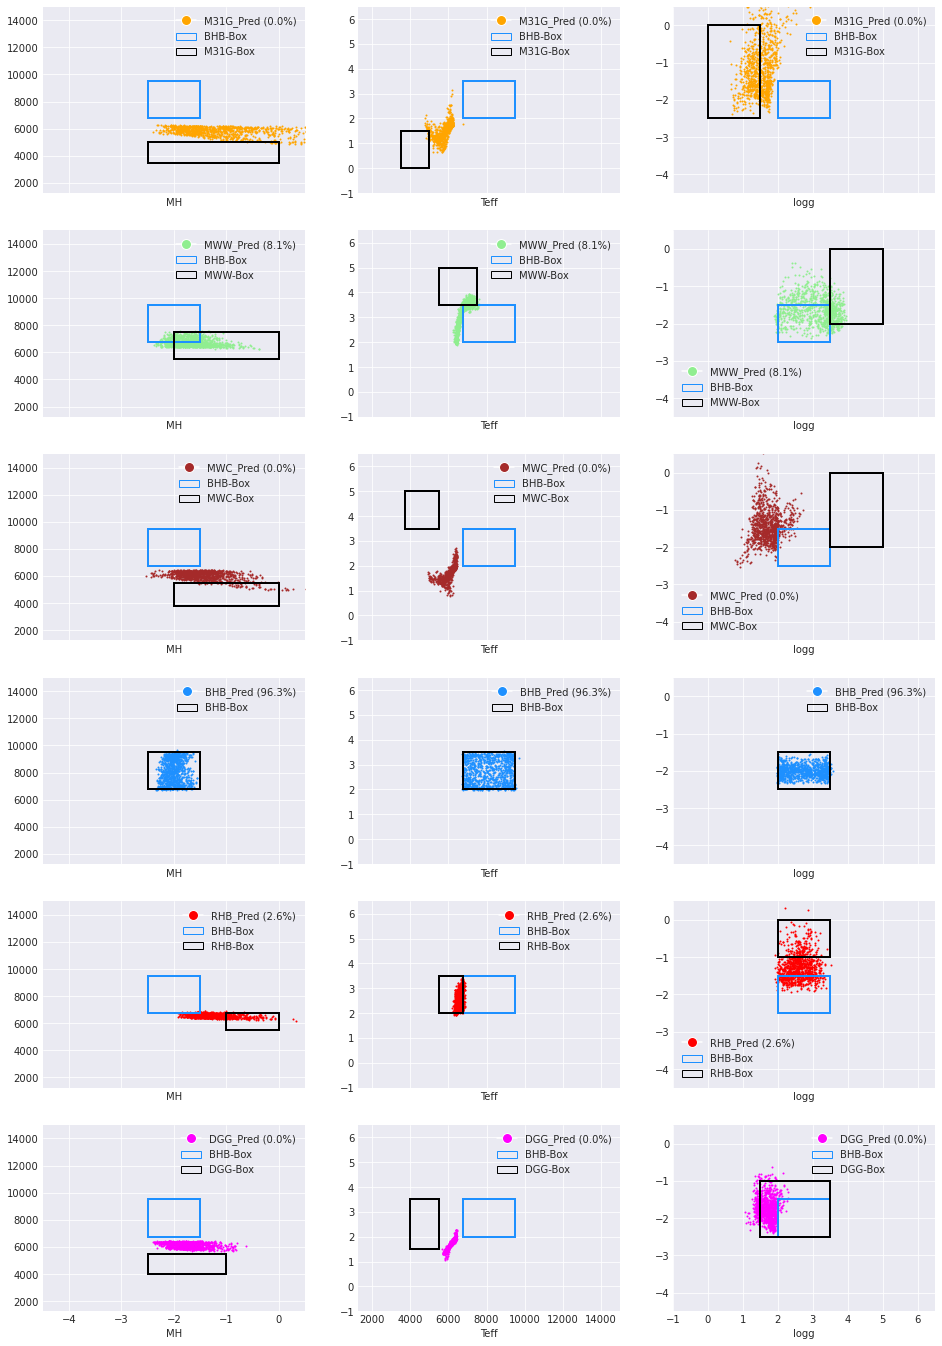

In [140]:
d.plot_pred_box_R0("B", large=1)

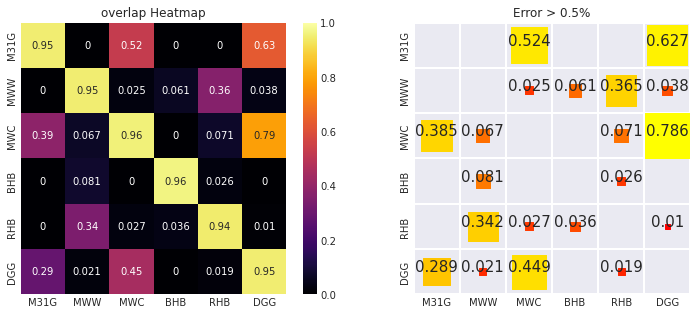

In [141]:
d.get_overlap_mat(plot=1)

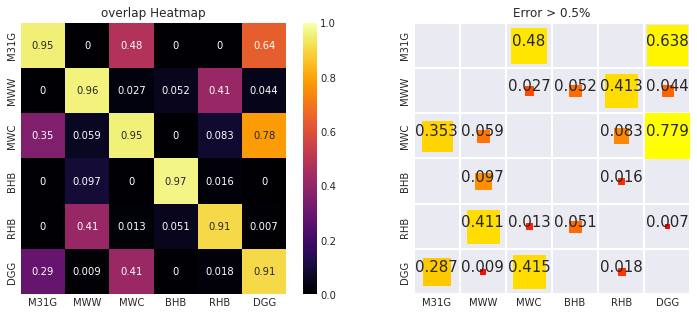

In [118]:
d.get_overlap_mat(plot=1)

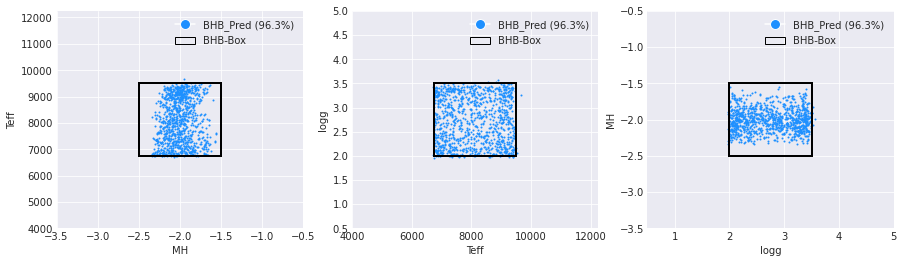

In [142]:
R0, R1="B", "B"
fn = d.plot_pred_fn_R0_R1(R0, R1)
d.plot_box_R0_R1(R0,R1, [fn], n_box=1)

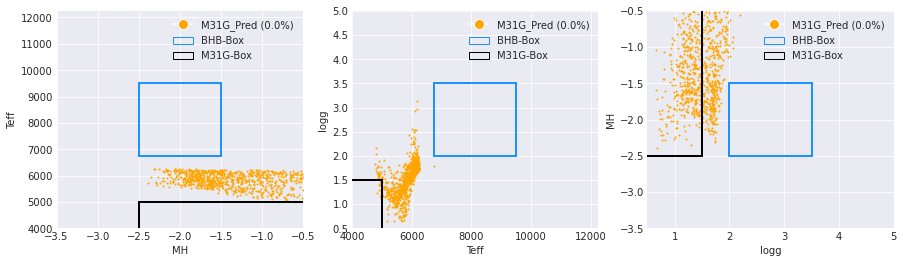

In [147]:
R0, R1="B", "M"
fn = d.plot_pred_fn_R0_R1(R0, R1)
d.plot_box_R0_R1(R0,R1, [fn], n_box=1)

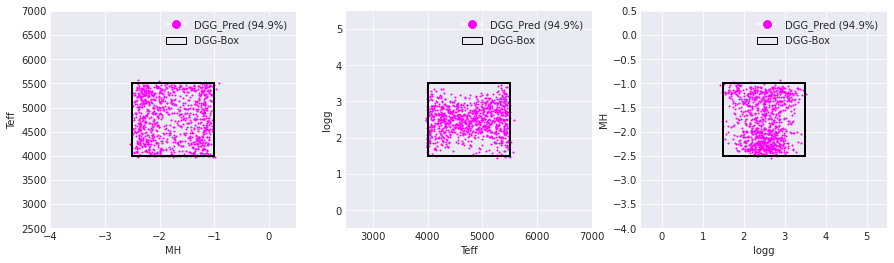

In [143]:
R0, R1="G", "G"
fn = d.plot_pred_fn_R0_R1(R0, R1)
d.plot_box_R0_R1(R0,R1, [fn], n_box=1)

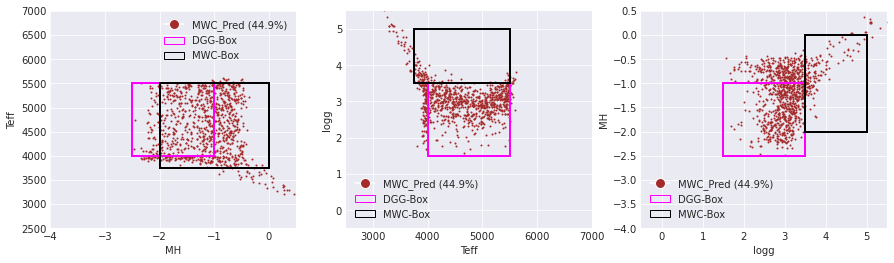

In [144]:
R0, R1="G", "C"
fn = d.plot_pred_fn_R0_R1(R0, R1)
d.plot_box_R0_R1(R0,R1, [fn], n_box=1)

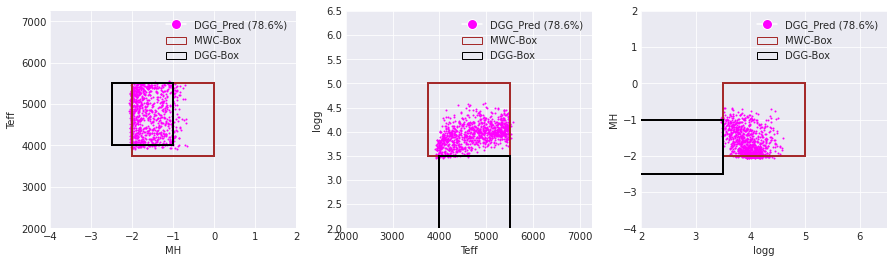

In [146]:
R0, R1="C", "G"
fn = d.plot_pred_fn_R0_R1(R0, R1)
d.plot_box_R0_R1(R0,R1, [fn], n_box=1)

# SNR

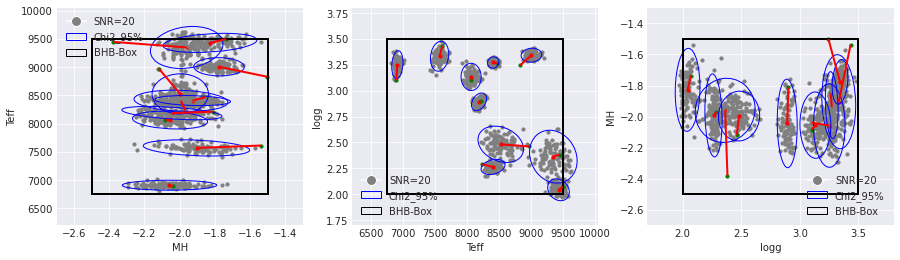

In [148]:
R="B"
d.init_snr_R(R)
d.eval_snr(R, snr=20)

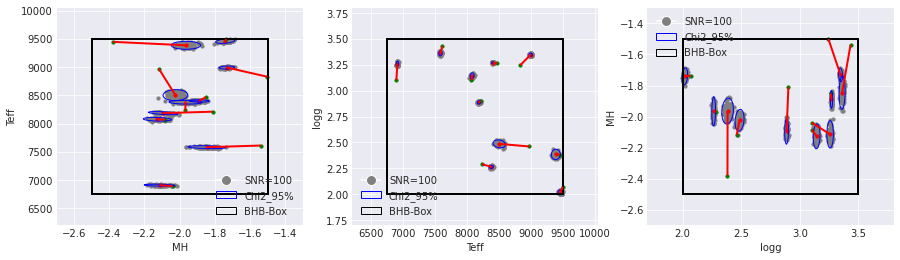

In [178]:
d.eval_snr("B", snr=100)

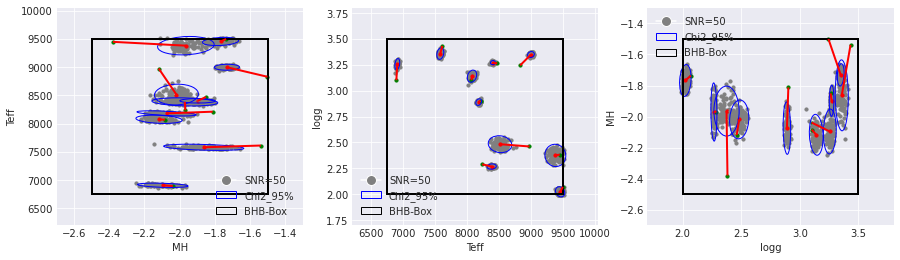

In [153]:
d.eval_snr("B", snr=50)

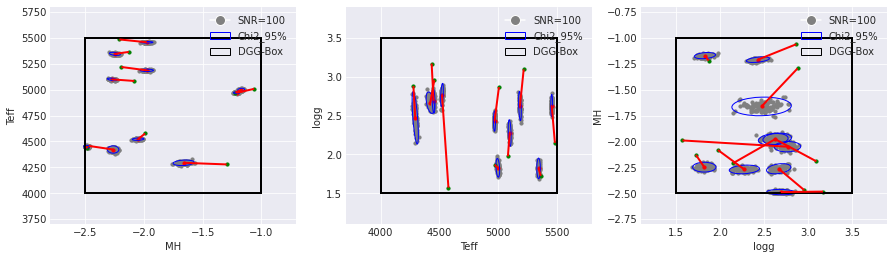

In [150]:
R="G"
d.init_snr_R(R)
d.eval_snr(R, snr=100)

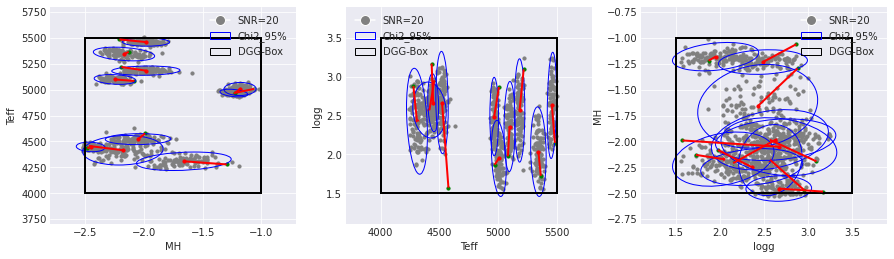

In [151]:
d.eval_snr(R, snr=20)

In [168]:
R0="B"
snr=20
i=0
RMSs=[]
for i in range(d.N_snr):
    preds = d.dSR[R0][i][snr]
    para = d.dSN_paras[R0][i]
    RMS = np.sqrt(np.mean((preds-para)**2, axis=0))
    RMSs.append(RMS)

In [169]:
RMSs = np.array(RMSs)

In [172]:
a = np.mean(RMSs, axis=0)

In [177]:
a[0]

0.20646374068432163

In [148]:
SN=10
PATH = f"/scratch/ceph/swei20/data/dnn/BHB/snr{SN}_1k.h5"
with h5py.File(PATH, "r") as f:
    nsflux = f["nsflux_R"][()]
    flux = f["flux_R"][()]

In [149]:
p_pred = ddp.predict_nsflux({"RML":nsflux}, "B", dnn=dnn)

In [150]:
ddp.ns_preds={"B": {}}
ddp.ns_preds["B"] = {"B": p_pred}

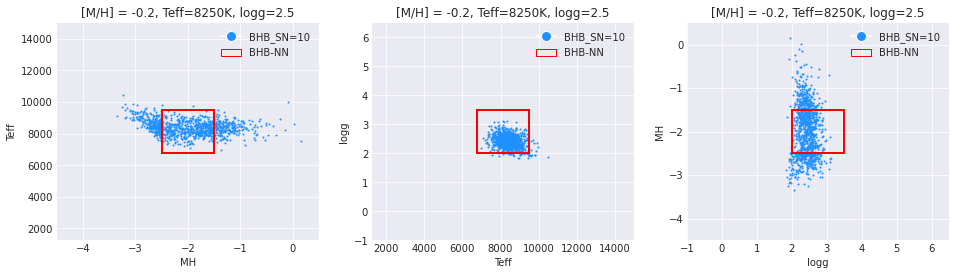

In [151]:

ddp.plot_nsbox_R0_R1("B", "B", SN, Ps=[-0.2, 8250, 2.5])

In [129]:
SN=100
PATH = f"/scratch/ceph/swei20/data/dnn/BHB/snr{SN}_1k.h5"
with h5py.File(PATH, "r") as f:
    nsflux = f["nsflux_R"][()]
    flux = f["flux_R"][()]

In [130]:
p_pred = ddp.predict_nsflux({"RML":nsflux}, "B", dnn=dnn)

In [131]:
p_pred

array([[-2.03895438e+00,  8.28323795e+03,  2.40518598e+00],
       [-1.96781856e+00,  8.23582782e+03,  2.49382615e+00],
       [-1.82410669e+00,  8.30950710e+03,  2.47091401e+00],
       ...,
       [-1.97906435e+00,  8.20973553e+03,  2.46400557e+00],
       [-2.01124737e+00,  8.18802921e+03,  2.47664459e+00],
       [-1.78430700e+00,  8.21739812e+03,  2.44394636e+00]])

In [132]:
ddp.ns_preds={"B": {}}
ddp.ns_preds["B"] = {"B": p_pred}

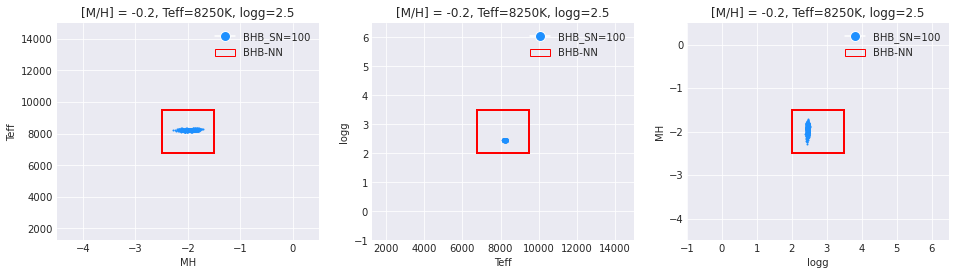

In [133]:

ddp.plot_nsbox_R0_R1("B", "B", SN, Ps=[-0.2, 8250, 2.5])

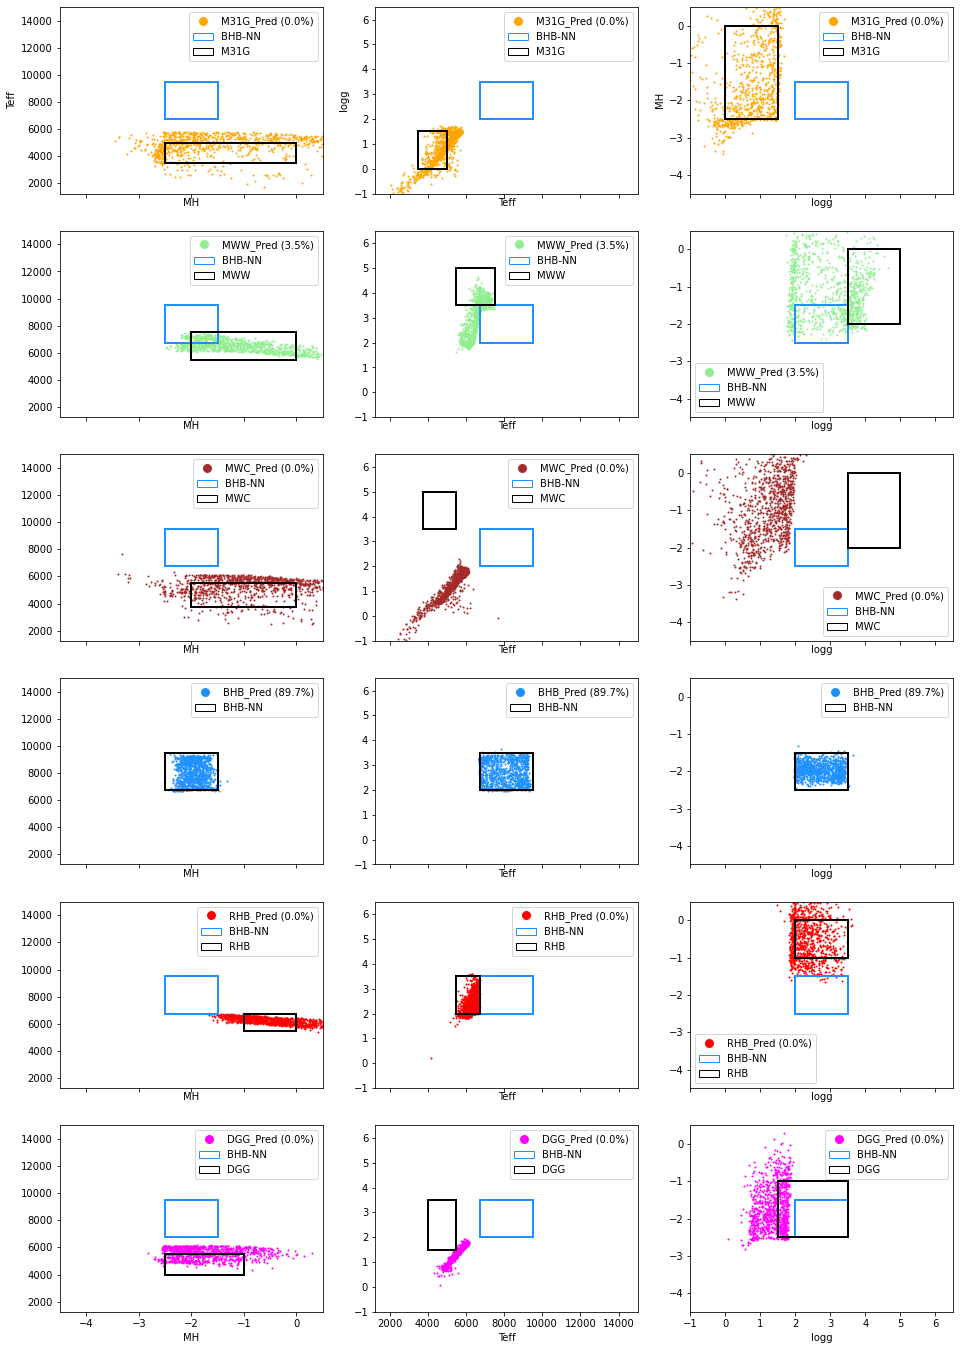

In [49]:
ddp.plot_box_R0("B", large=1)

In [72]:
wave, flux, err, pval, snr = ddp.load_RBF_W_R("RML", "B", 1000)

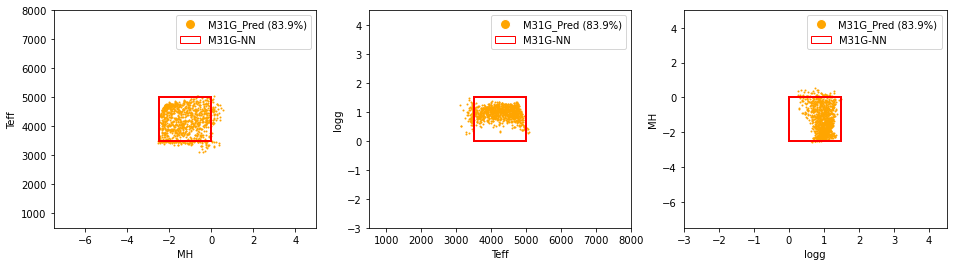

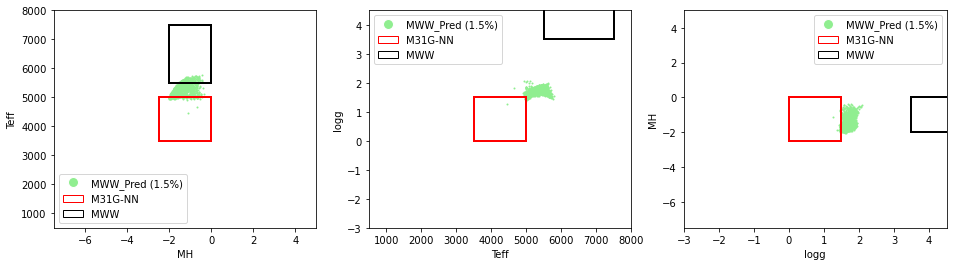

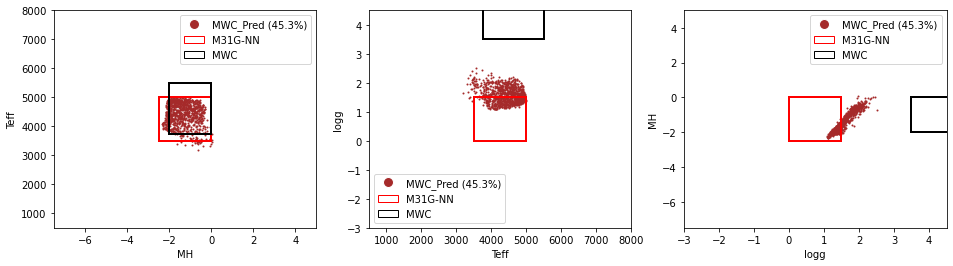

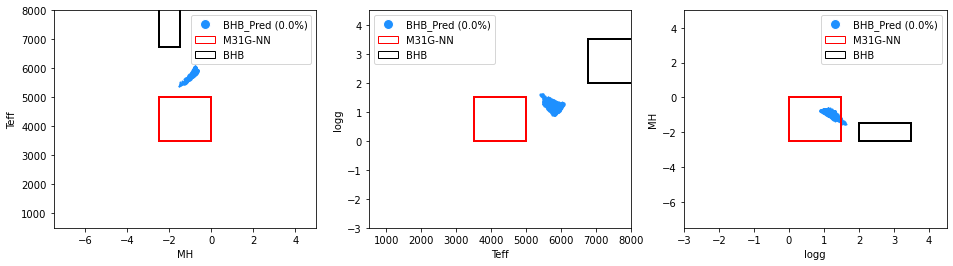

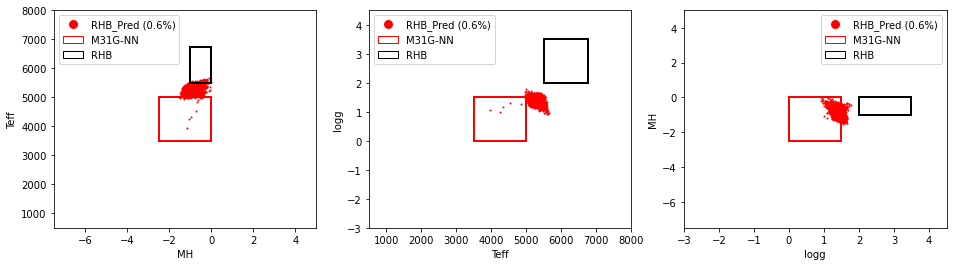

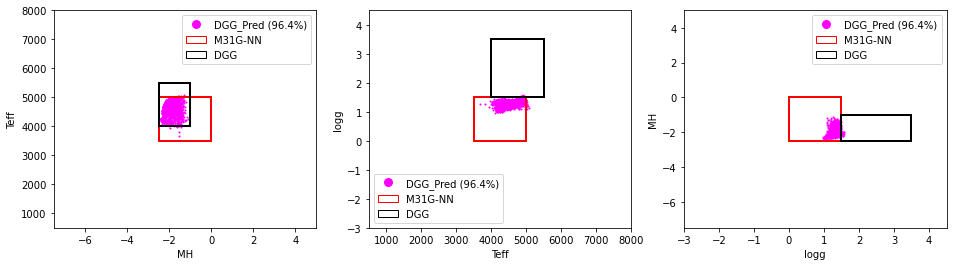

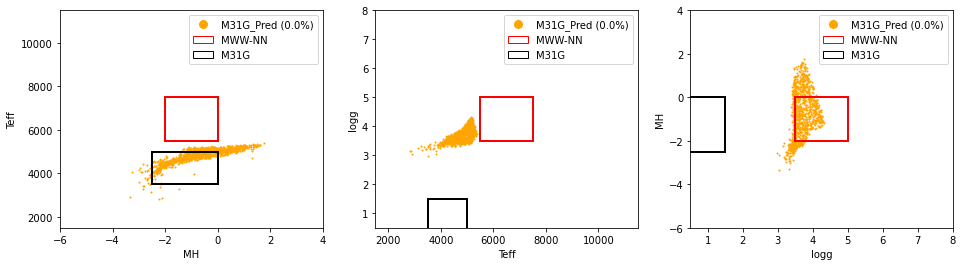

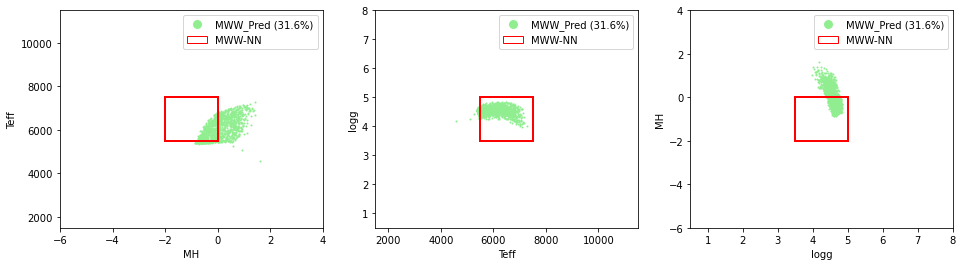

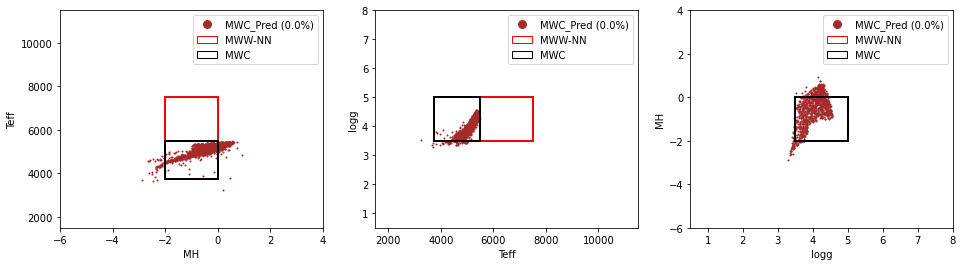

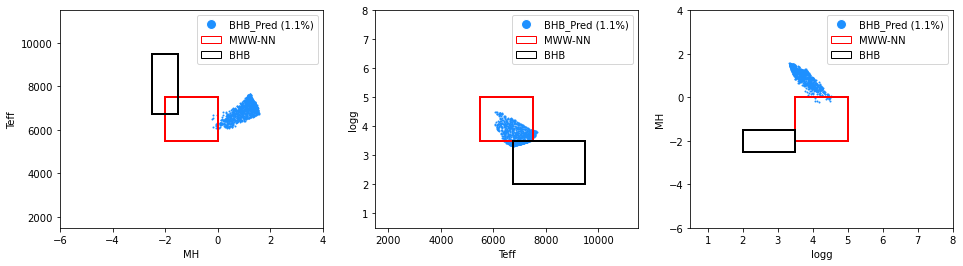

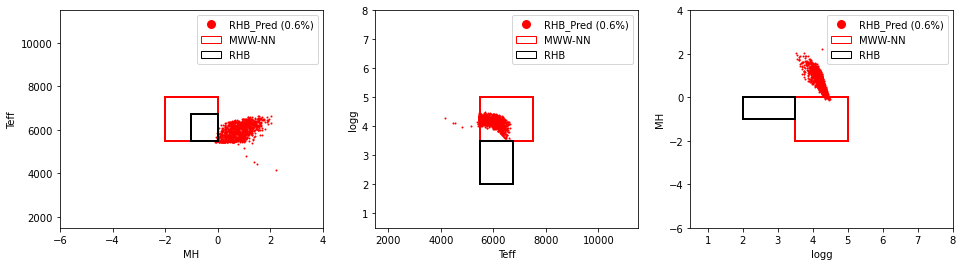

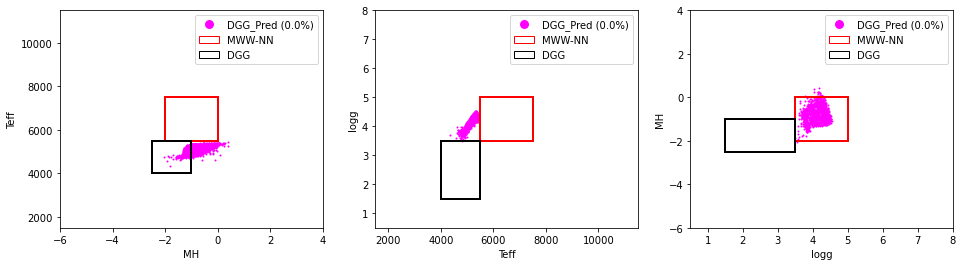

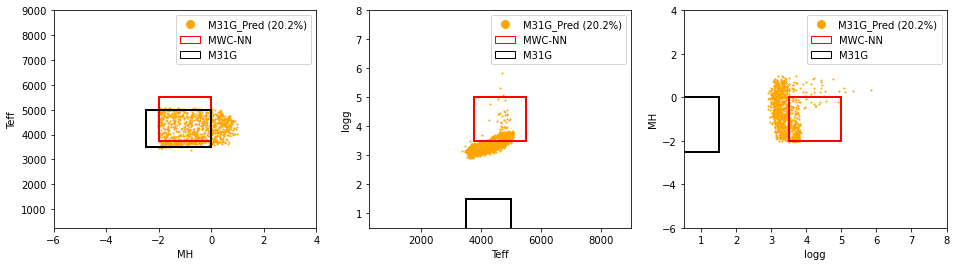

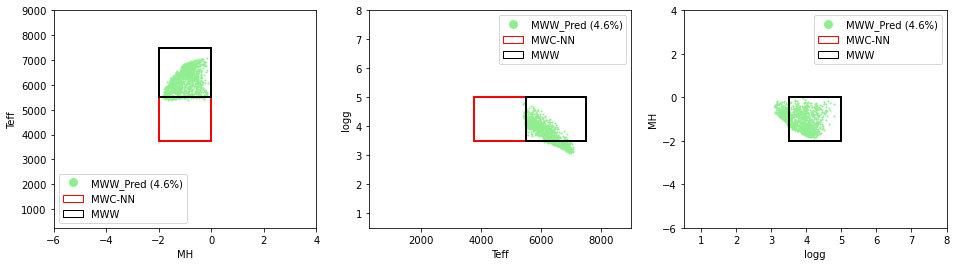

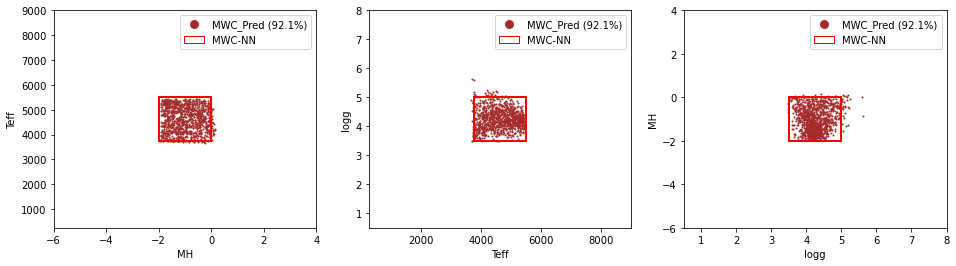

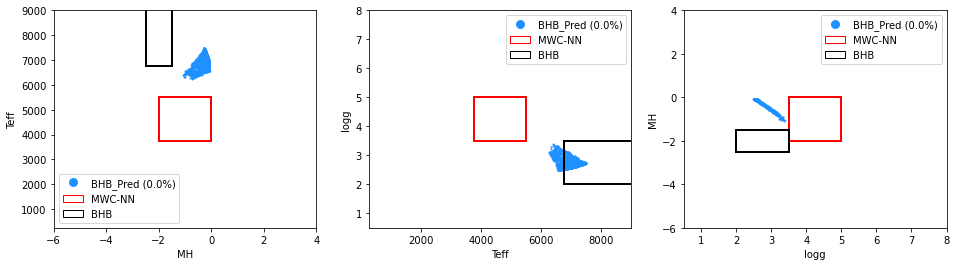

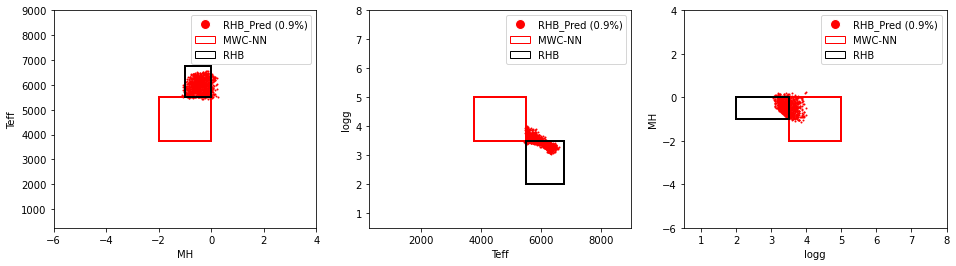

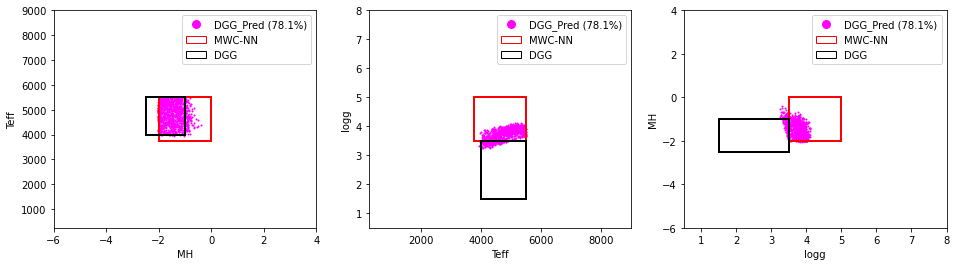

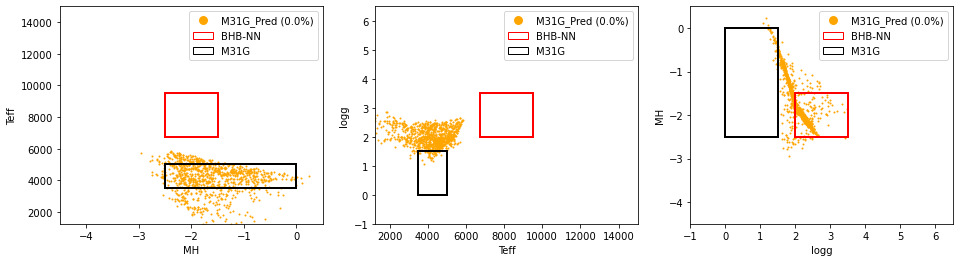

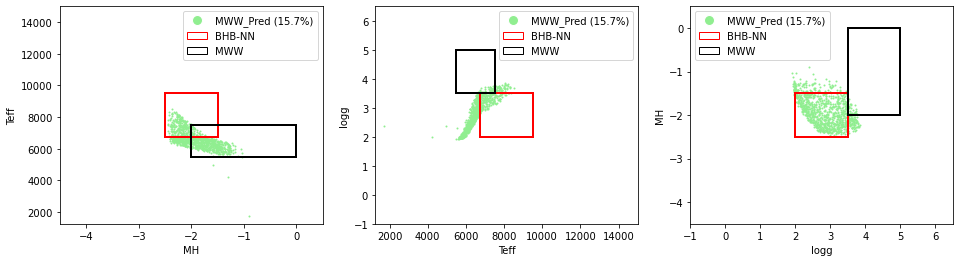

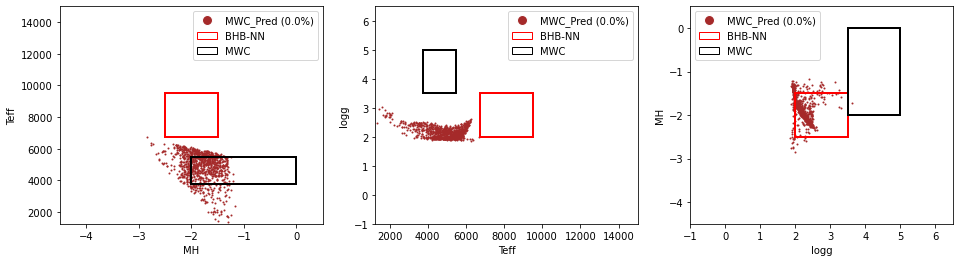

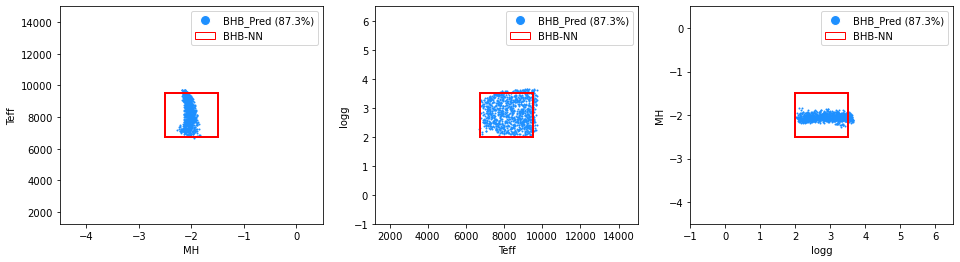

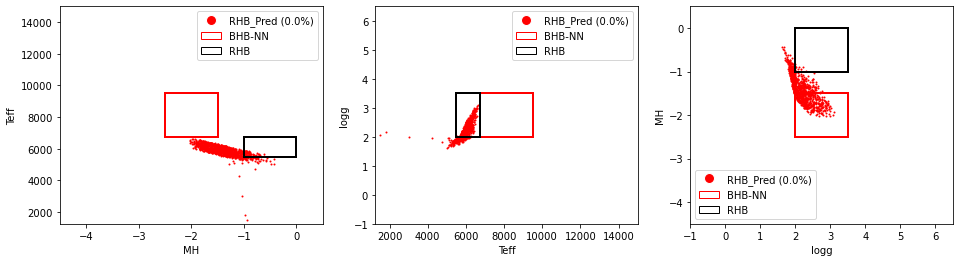

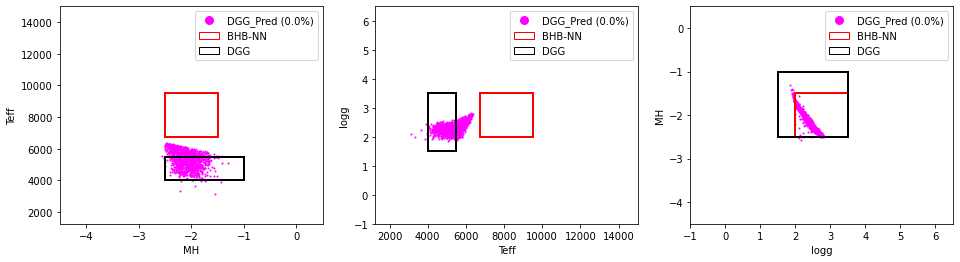

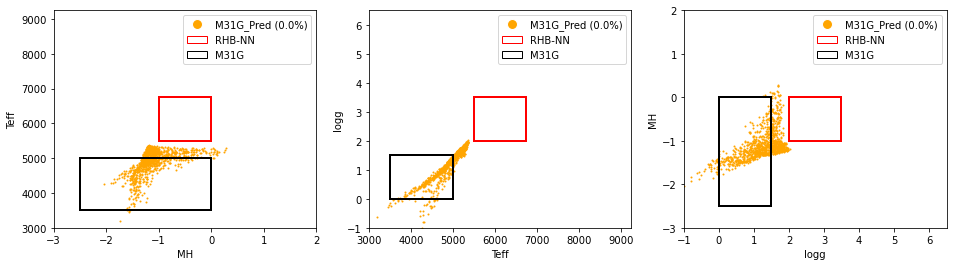

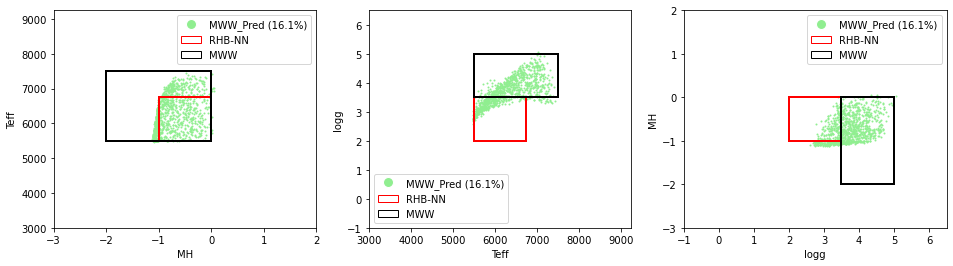

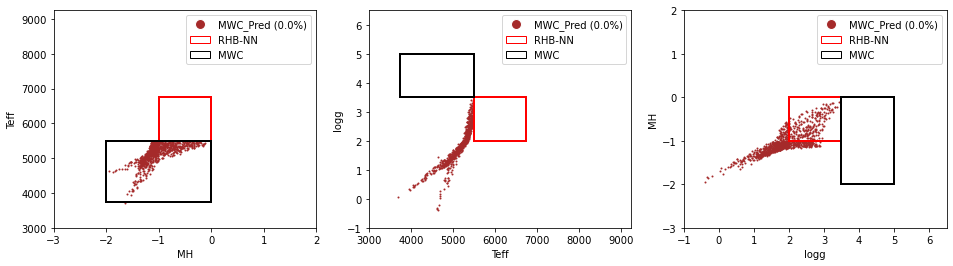

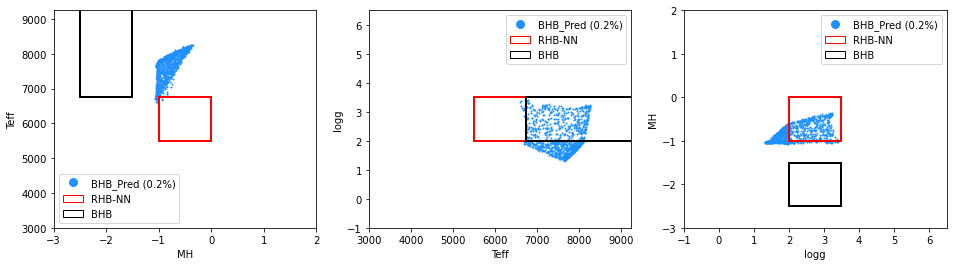

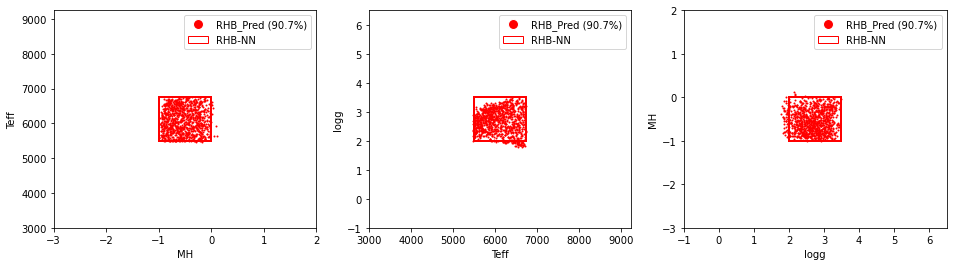

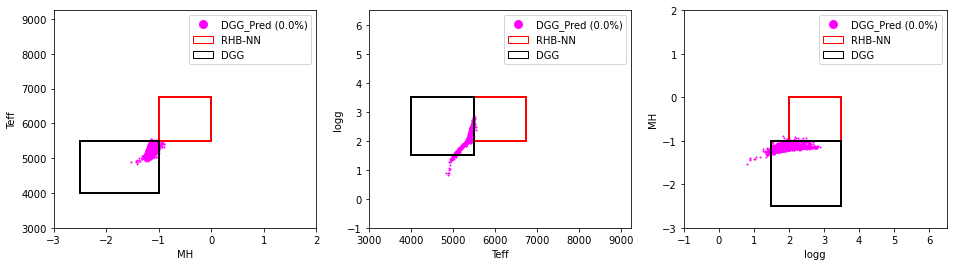

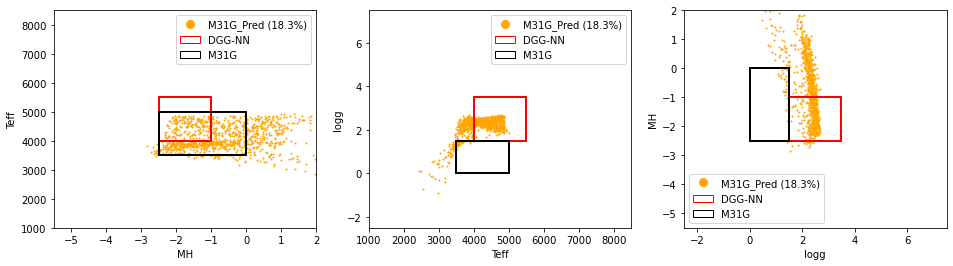

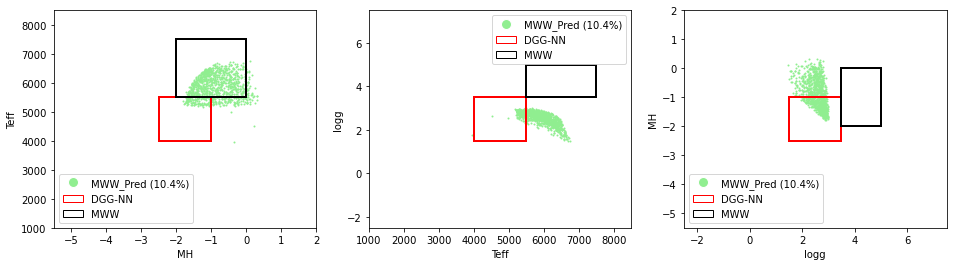

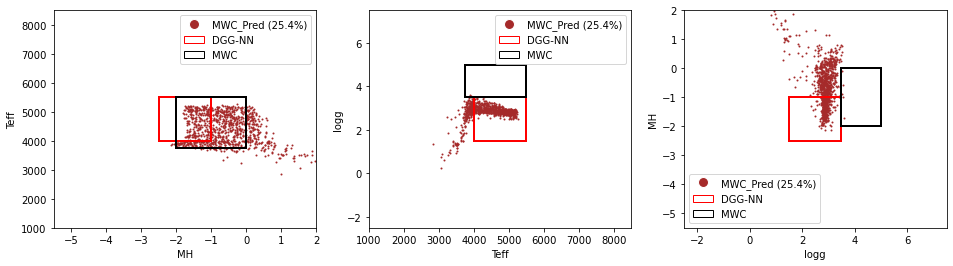

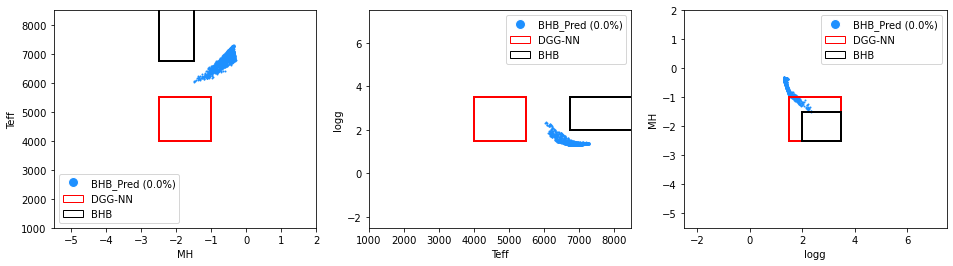

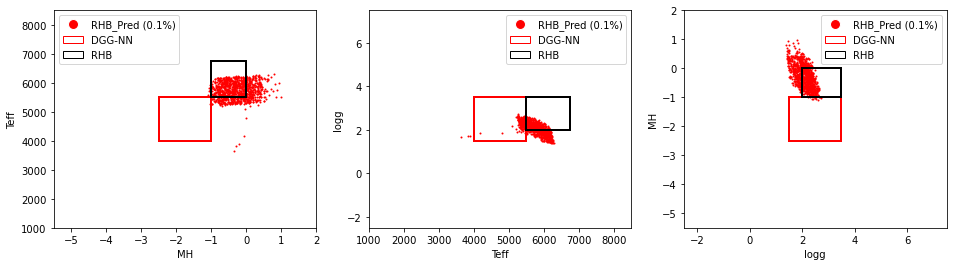

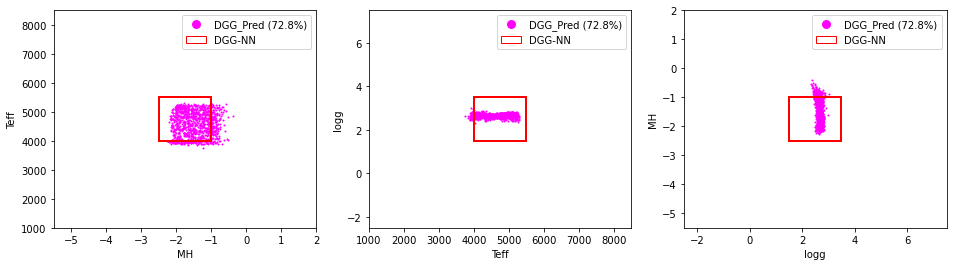

In [77]:
for R0 in ddp.Rnms:
    for R1 in ddp.Rnms:
        ddp.plot_box_R0_R1(R0, R1, n_box=2, axs=None) 

In [104]:
np.min(snr)

27.66242671841118

In [109]:
np.argmin(abs(snr - 30))

95

In [133]:
def plot_SN(SNval=30, W="RML", R="B", rate=1):
    nsdx = np.argmin(abs(snr - SNval))
    Ps = pval[nsdx]
    nsfluxs = ddp.add_noise_N(flux[nsdx], err[nsdx], 1000, rate=rate)
    p_pred = ddp.trans_predict(nsfluxs, W, R)
    ddp.ns_preds={R: {}}
    ddp.ns_preds[R] = {R: p_pred}
    if rate == 1: 
        SN = snr[nsdx]
    else:
        SN = ddp.get_snr(nsfluxs)
    ddp.plot_box_R0_R1(R, R, SN=np.around(SN), Ps=Ps, n_box=0.5)

In [130]:
SNval=30
rate=2
nsdx = np.argmin(abs(snr - SNval))
Ps = pval[nsdx]
nsfluxs = ddp.add_noise_N(flux[nsdx], err[nsdx], 1000, rate=rate)


In [ ]:
err

In [127]:
ddp.get_snr(nsfluxs[0])

not list


62.69041541856068

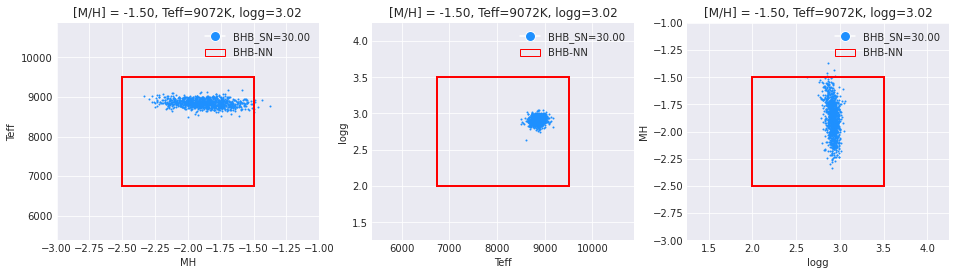

In [134]:
plot_SN(rate=1.)

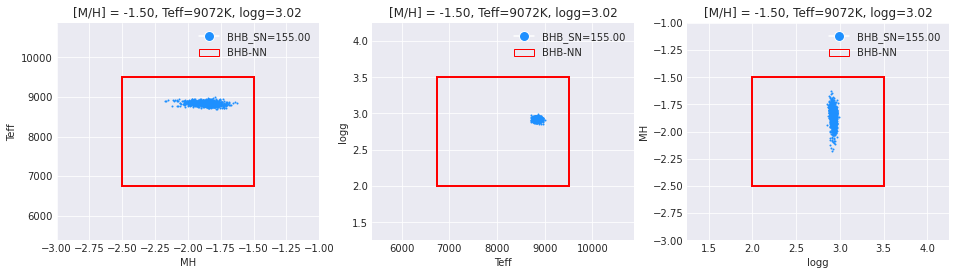

In [136]:
plot_SN(rate=0.5)

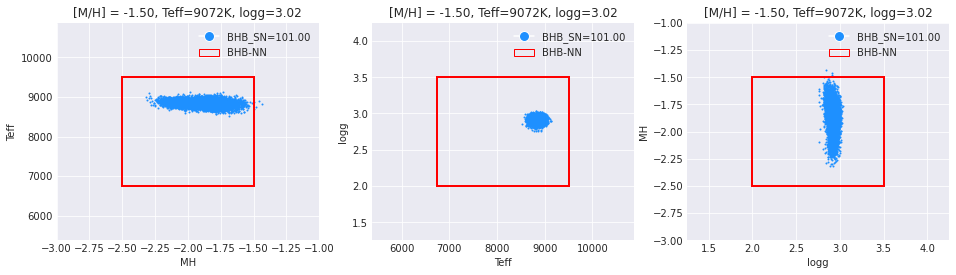

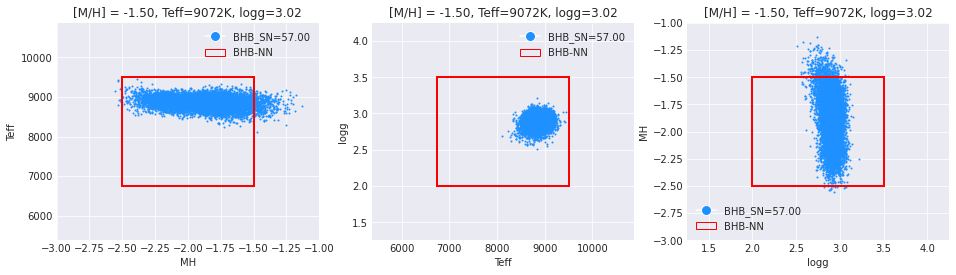

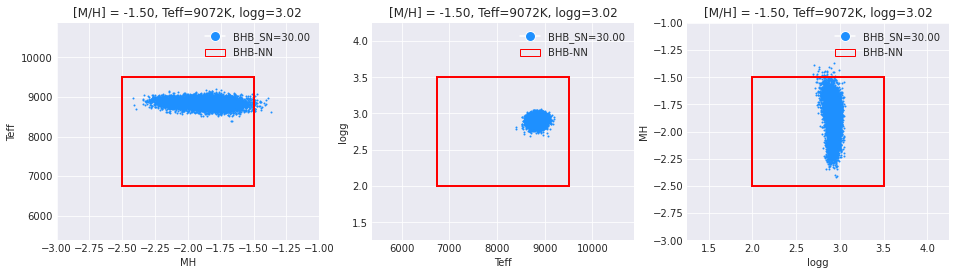

In [118]:
for r in [ 0.8,1.5, 1]:
    plot_SN(rate=r) 

generate noise model for new box

dose snr work for R5000

take 1 model from region and add noise
error projection. snr = 10 * sqrt(2), Bosz_R5000, 30, 60

In [ ]:
sqrt(20)

snr at original /observed spec.

In [51]:
ddp.get_overlap_mat()

KeyError: 'M'

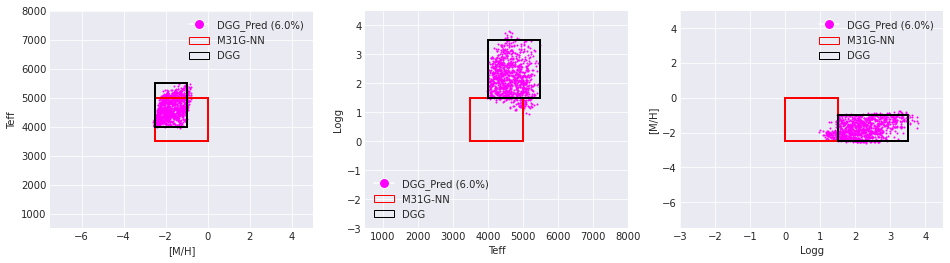

In [242]:
R0, R1 = "M", "G"
ddp.plot_box_R0_R1(R0, R1, n_box=2, axs=None)